<h1 style="text-align:center;font-size:50px;font-family:'Copperplate';">Analiza fantazijskih knjig</h1>

<h2 style="text-align:center;font-family:Verdana;font-size:40px;margin-bottom:1cm;"> Priprava </h2>

In [98]:
import pandas as pd
import zlato_desetletje as zld

In [99]:
podatki = pd.read_csv("C:\\Users\\Benjamin\\Desktop\\Šola\\FMF\\UVP\\UVP_Projektna_naloga_2024\\podatki_fantazijske_knjige.csv", index_col='Naslov')

In [100]:
podatki.fillna(0, inplace=True)

In [101]:
# Sprememba decimalnih števil, ki bi morala biti cela, v cela števila.
podatki['Dolžina'] = podatki['Dolžina'].astype(int, errors='ignore')
podatki['Leto izida'] = podatki['Leto izida'].astype(int, errors='ignore')
podatki['Število bralcev'] = podatki['Število bralcev'].astype(int, errors='ignore')

In [102]:
podatki['Desetletje'] = (podatki['Leto izida']//10)*10

In [103]:
podatki = podatki[['Avtor', 'Leto izida', 'Desetletje', 'Dolžina', 'Točke', 'Ocena', 'Število bralcev']]

In [104]:
podatki.reset_index(inplace=True)

In [105]:
podatki.drop_duplicates(subset='Naslov', keep='first', inplace=True)

In [106]:
# Izključitev knjige "Harry Potter and the Phylosopher's Stone", saj je upoštevana "Harry Potter and the Sorcerer's Stone"
# z istimi vrednostmi atributov
podatki.drop(895, inplace=True)

In [107]:
podatki.set_index('Naslov', inplace=True)

In [108]:
podatki

,Avtor,Leto izida,Desetletje,Dolžina,Točke,Ocena,Število bralcev
Naslov,,,,,,,
"The Hobbit (The Lord of the Rings, #0)",J.R.R. Tolkien,1937,1930,366,5793,4.29,4067050
Lost Horizon,James Hilton,1933,1930,241,1276,3.95,22940
At the Mountains of Madness,H.P. Lovecraft,1931,1930,194,1185,3.81,55059
"Mary Poppins (Mary Poppins, #1)",P.L. Travers,1934,1930,209,1169,4.01,134801
"The Sword in the Stone (The Once and Future King, #1)",T.H. White,1938,1930,352,968,3.89,26897
...,...,...,...,...,...,...,...
"The Wizard of Eventide (The Goddess War, 3)",Kelley Skovron,2022,2020,400,18,4.14,78
"The Fury of the Gods (The Bloodsworn Saga, #3)",John Gwynne,2024,2020,528,15,4.47,106
"Age of Ash (Kithamar, #1)",Daniel Abraham,2022,2020,448,14,3.68,3424


In [109]:
po_desetletjih = podatki.groupby('Desetletje')

<h2 style="text-align:center;font-family:Verdana;font-size:40px;margin-bottom:1cm;"> Lestvice najboljših </h2>

<p style="font-family:'Times New Roman';font-size:20px;"> Najprej si poglejmo najboljših 10 predstavnikov iz vsake kategorije. Z rezultati si bo lahko vsak ljubitelj fantazijskega žanra pomagal pri odločitvi, katere knjige oz. avtorje se najbolj splača brati.</p>

<h3 style="text-align:center;font-family:Garamond;font-size:30px;"> Najkvalitetnejše knjige </h3>

<p style="font-family:'Times New Roman';font-size:20px;margin-bottom:0.5cm;"> Poizvedimo najprej, katere knjige so najkvalitetnejše. Kot merilo kvalitete vzemimo št. točk oz. t. i. "score", kakor je navedeno na spletni strani. Točke upoštevajo št. bralcev, ki je ocenilo knjigo, ter povprečno oceno, ki so ji jo prisodili.</p>

In [110]:
naj_knjige_po_tockah = pd.DataFrame(podatki['Točke'].sort_values(ascending=False))

In [111]:
naj_knjige_po_tockah.reset_index(inplace=True)

In [112]:
naj_knjige_po_tockah.index += 1

In [113]:
naj_knjige_po_tockah.head(10)

,Naslov,Točke
1,"The Way of Kings (The Stormlight Archive, #1)",66172
2,"Words of Radiance (The Stormlight Archive, #2)",51565
3,"The Wise Man’s Fear (The Kingkiller Chronicle,...",43622
4,Harry Potter and the Sorcerer's Stone (Harry P...,25663
5,"A Game of Thrones (A Song of Ice and Fire, #1)",24076
6,"The Eye of the World (The Wheel of Time, #1)",21596
7,The Name of the Wind (The Kingkiller Chronicle...,20124
8,The Final Empire (Mistborn #1),17752
9,"Red Rising (Red Rising Saga, #1)",16497
10,Harry Potter and the Deathly Hallows (Harry Po...,16296


<h3 style="text-align:center;font-family:Vedrana;font-size:30px;"> Najkvalitetnejši avtorji </h3>

<p style="font-family:'Times New Roman';font-size:20px;margin-bottom:0.5cm;"> Sedaj analizirajmo avtorje po kvaliteti knjig, ki so jih napisali. Kot merilo zopet vzemimo število točk, le da tokrat avtorju pripišimo povprečje točk njegovih knjig.</p>

In [114]:
po_avtorjih = podatki.groupby('Avtor')

In [115]:
naj_avtorji_po_tockah = (pd.DataFrame(po_avtorjih['Točke'].mean())).sort_values(by='Točke',ascending=False)

In [116]:
naj_avtorji_po_tockah['Točke'] = round(naj_avtorji_po_tockah['Točke'], 2)

In [117]:
naj_avtorji_po_tockah.reset_index(inplace=True)

In [118]:
naj_avtorji_po_tockah.index += 1

In [119]:
naj_avtorji_po_tockah.head(10)

,Avtor,Točke
1,Patrick Rothfuss,21508.67
2,Brandon Sanderson,8929.54
3,Scott Lynch,8780.50
4,J.K. Rowling,8421.50
5,Robert Jordan,6818.79
6,Pierce Brown,6769.25
7,Neil Gaiman,6574.14
8,William Goldman,6363.00
9,Erin Morgenstern,5810.00
10,Terry Goodkind,5705.00


<h3 style="text-align:center;font-family:Garamond;font-size:30px;"> Najbolj brane knjige </h3>

<p style="font-family:'Times New Roman'; font-size:20px;margin-bottom:0.5cm;"> Kot zanimivost si poglejmo še, katere so najbolj brane knjige in najbolj brani avtorji ter rezultata primerjajmo z zgornjima. Kot kriterij sem vzel število ljudi, ki je ocenilo knjigo na spletni strani, saj dejanskega števila ljudi, ki so prebrali knjigo, ni mogoče zares ugotoviti.</p>

In [120]:
naj_knjige_po_bralcih = podatki.sort_values(by='Število bralcev', ascending=False)

In [121]:
naj_knjige_po_bralcih = pd.DataFrame(naj_knjige_po_bralcih['Število bralcev'])

In [122]:
naj_knjige_po_bralcih.reset_index(inplace=True)

In [123]:
naj_knjige_po_bralcih.index += 1

In [124]:
naj_knjige_po_bralcih.head(10)

,Naslov,Število bralcev
1,Harry Potter and the Sorcerer's Stone (Harry P...,10271334
2,Harry Potter and the Philosopher’s Stone (Harr...,10271334
3,"The Hunger Games (The Hunger Games, #1)",8859007
4,"Twilight (The Twilight Saga, #1)",6698056
5,Harry Potter and the Prisoner of Azkaban (Harr...,4291784
6,"The Hobbit (The Lord of the Rings, #0)",4067050
7,"Divergent (Divergent, #1)",4049910
8,Harry Potter and the Chamber of Secrets (Harry...,4017607
9,Animal Farm,3978536
10,Harry Potter and the Deathly Hallows (Harry Po...,3777239


<h3 style="text-align:center;font-family:Garamond;font-size:30px;"> Najbolj brani avtorji </h3>

<p style="font-family:'Times New Roman';font-size:20px;margin-bottom:0.5cm;"> Še po avtorjih </p>

In [125]:
naj_avtorji_po_bralcih = (pd.DataFrame(po_avtorjih['Število bralcev'].mean())).sort_values(by='Število bralcev', ascending=False)

In [126]:
naj_avtorji_po_bralcih.reset_index(inplace=True)

In [127]:
naj_avtorji_po_bralcih.index += 1

In [128]:
naj_avtorji_po_bralcih.head(10)

,Avtor,Število bralcev
1,George Orwell,3.978536e+06
2,J.K. Rowling,3.734169e+06
3,Suzanne Collins,3.218892e+06
4,Alice Sebold,2.376406e+06
5,Stephenie Meyer,2.246038e+06
6,Veronica Roth,2.214468e+06
7,Antoine de Saint-Exupéry,2.158323e+06
8,Rebecca Yarros,1.845910e+06
9,Audrey Niffenegger,1.800145e+06
10,Yann Martel,1.646466e+06


<h3 style="text-align:center;font-family:Garamond;font-size:30px;"> Sklepi </h3>

<p style="font-family:'Times New Roman';font-size:20px;margin-bottom:1cm;"> Nek tekst </p>

<h2 style="text-align:center;font-family:Verdana;font-size:40px;margin-bottom:1cm;"> Analiza trendov</h2>

<p style="font-family:'Times New Roman';font-size:20px;margin-bottom:0.5cm;"> Zanima nas tudi podrobnejše dogajanje v fantazijskem žanru.<br> Kot bralci bi se lahko vprašali, kako se tekom let in desetletij spreminjajo kvaliteta, dolžina in branost književnih del. Prav tako bi vsekakor želeli vedeti, ali so daljše knjige tudi kvalitetnejše ter ali ljudje raje berejo daljše ali krajše knjige.<br> Iz rezultatov analize bomo poskusili napovedati trende na tem področju v prihodnosti.</p>

<h3 style="text-align:center;font-family:Garamond;font-size:30px;"> Odvisnost kvalitete knjige od leta izida </h3>

<p style="font-family:'Times New Roman';font-size:20px;margin-bottom:0.5cm;"> Oglejmo si, kako se je spreminjala kvaliteta knjig v odvisnosti od desetletja izida. Pri tem glejmo samo knjige z znanim letom izida, ki so izšle leta 1920 ali kasneje. </p>

In [129]:
izid_leto = po_desetletjih.agg(
**{
    'Kvaliteta': pd.NamedAgg(column='Točke', aggfunc='mean')
})

In [130]:
izid_leto.drop([0, 1840, 1890], axis='index', inplace=True)

In [131]:
izid_leto['Kvaliteta'] = round(izid_leto['Kvaliteta'], 2)

In [132]:
izid_leto

,Kvaliteta
Desetletje,
1920,217.00
1930,404.39
1940,353.73
1950,1241.12
1960,787.73
1970,1087.31
1980,1229.12
1990,1172.40
2000,665.62


<Axes: xlabel='Desetletje', ylabel='Točke'>

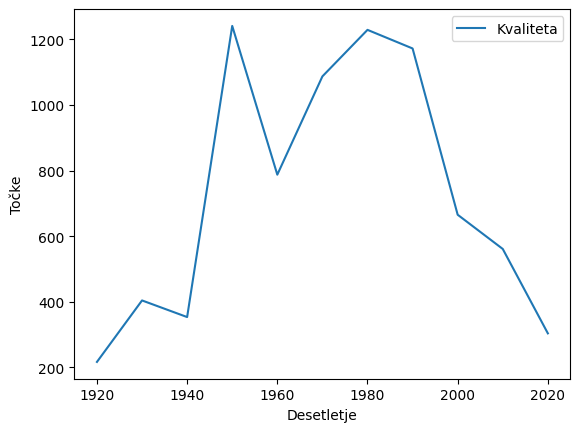

In [133]:
izid_leto.plot(ylabel='Točke')

<h3 style="text-align:center;font-family:Garamond;font-size:30px;margin-bottom:0.5cm;"> Odvisnost dolžine knjige od leta izida </h3>

In [134]:
leto_dolzina = po_desetletjih.agg(
    **{
'Dolžina': pd.NamedAgg(column='Dolžina', aggfunc='mean')
    })

In [136]:
leto_dolzina.drop([0, 1840, 1890], inplace=True)

In [137]:
leto_dolzina

,Dolžina
Desetletje,
1920,294.000000
1930,186.843137
1940,238.333333
1950,264.431373
1960,223.808219
1970,281.138686
1980,336.572755
1990,418.138587
2000,433.270085


<Axes: xlabel='Desetletje', ylabel='Povprečna dolžina knjig (strani)'>

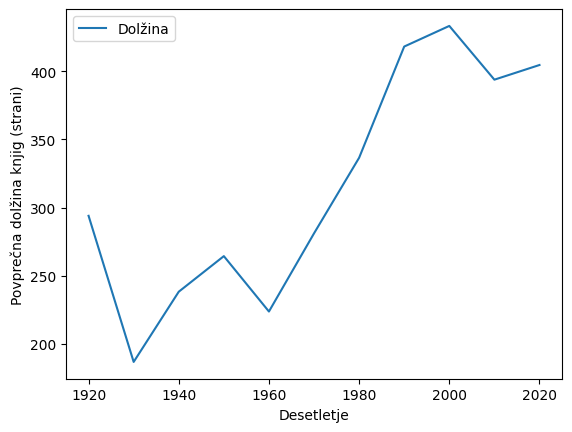

In [138]:
leto_dolzina.plot(ylabel='Povprečna dolžina knjig (strani)')

<h3 style="text-align:center;font-family:Garamond;font-size:30px;"> Odvisnost kvalitete od dolžine </h3>

<p style="font-family:'Times New Roman';font-size:20px;margin-bottom:0.5cm"> Radi bi videli, ali so daljše knjige kvalitetnejše. Pogledali bomo, koliko točk povprečno prejme vsaka knjiga iz posameznega razreda, pri čemer en razred predstavljajo vse tiste knjige, katerih števila strani dajo pri deljenju s 50 isti celi del.</p>

In [139]:
dolzina_kvaliteta = podatki[['Dolžina', 'Točke']]

In [140]:
dolzina_kvaliteta['Razred dolžine'] = (dolzina_kvaliteta['Dolžina']//50)*50

In [141]:
dolzina_kvaliteta

,Dolžina,Točke,Razred dolžine
Naslov,,,
"The Hobbit (The Lord of the Rings, #0)",366,5793,350
Lost Horizon,241,1276,200
At the Mountains of Madness,194,1185,150
"Mary Poppins (Mary Poppins, #1)",209,1169,200
"The Sword in the Stone (The Once and Future King, #1)",352,968,350
...,...,...,...
"The Wizard of Eventide (The Goddess War, 3)",400,18,400
"The Fury of the Gods (The Bloodsworn Saga, #3)",528,15,500
"Age of Ash (Kithamar, #1)",448,14,400


In [142]:
po_dolzini = dolzina_kvaliteta.groupby('Razred dolžine')

In [143]:
dolzina_tocke = pd.DataFrame(po_dolzini['Točke'].mean())

In [144]:
dolzina_tocke

,Točke
Razred dolžine,
0,363.736434
50,144.606061
100,353.705263
150,570.470899
200,611.826667
250,393.810198
300,502.796491
350,588.918561
400,603.063736


<Axes: xlabel='Razred dolžine', ylabel='Točke'>

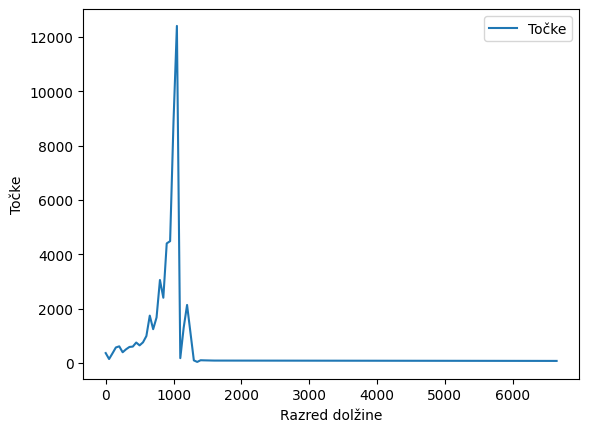

In [146]:
dolzina_tocke.plot(xlabel='Razred dolžine', ylabel='Točke')

In [145]:
podatki[podatki['Dolžina'] > 1700]

,Avtor,Leto izida,Desetletje,Dolžina,Točke,Ocena,Število bralcev
Naslov,,,,,,,
"Worm (Parahumans, #1)",Wildbow,2013,2010,6680,75,4.6,9403


<p style="font-family:'Times New Roman';font-size:20px;margin-bottom:0.5cm;margin-top:0.5cm;"> Vidimo lahko, da ima samo ena knjiga ekstremno dolžino. Da bo graf bolj informativen in da bomo lažje razbrali trend pri ostalih knjigah, ta podatek začano odstranimo. </p>

<p style="color:red;"> Ostal v tej vrstici!</p>

<h3 style="text-align:center;font-family:Garamond;font-size:30px;margin-bottom:0.5cm;"> Odvisnost števila bralcev od dolžine </h3>

In [ ]:
podatki['Razred dolžine'] = (podatki['Dolžina']//50)*50 

In [ ]:
po_razredih_dolzine = podatki.groupby('Razred dolžine')

In [ ]:
dolzina_bralci = pd.DataFrame(po_razredih_dolzine['Število bralcev'].sum()) 

In [ ]:
dolzina_bralci.plot(ylabel='Skupno število bralcev (v milijonih)')

<h3 style="text-align:center;font-family:Garamond;font-size:30px;"> Sklepi </h3>

<p style="font-family:'Times New Roman';font-size:20px;margin-bottom:1cm;"> paragraf </p>

<h2 style="text-align:center;font-family:Verdana;font-size:40px;margin-bottom:1cm;"> Zlata leta fantazijskega žanra </h2>

<p style="font-family:'Times New Roman';font-size:20px;"> Za konec si poglejmo še, katera so bila tista "zlata leta" fantazijskega žanra, tj. v katerem desetletju so nastajali najboljši fantazijski romani. <br> To bomo ugotovili tako, da bomo pogledali razvrstitev desetletij po določenih kategorijah, jim vsakič pripisali neko število točk, na koncu pa točke sešteli in kot najboljše desetletje razglasili tisto desetletje, ki bo imelo največ točk.</p>
<p style="font-family:'Times New Roman';font-size:20px;margin-bottom:0.5cm;"> Omenjene kategorije bodo: <ul style="font-family:'Times New Roman';font-size:20px;margin-bottom:0.3cm">
    <li> število knjig, ki so bile napisane v desetletju,</li>
    <li> povprečna kvaliteta knjig,</li>
    <li> število bralcev, ki je prebralo knjige iz določenega desetletja in</li>
    <li> število avtorjev, ki je ustvarjalo v posameznem desetletju.</li>
    </ul></p>
<p style="font-family:'Times New Roman';font-size:20px;margin-bottom:0.5cm;"> Pri tem bomo izločili knjige, ki nimajo navedenega leta objave, gledali pa bomo samo knjige, objavljene od leta 1920 naprej. </p>

In [ ]:
analiza_po_desetletjih = po_desetletjih.agg(
**{
    'Število knjig' : pd.NamedAgg(column='Točke', aggfunc='size'),
    'Kvaliteta' : pd.NamedAgg(column='Točke', aggfunc='mean'),
    'Število bralcev' : pd.NamedAgg(column='Število bralcev', aggfunc='sum'),
    'Število avtorjev' : pd.NamedAgg(column='Avtor', aggfunc=lambda x: len(x.unique()))
    
})

In [ ]:
analiza_po_desetletjih.drop([0, 1840, 1890], inplace=True)

In [ ]:
analiza_po_desetletjih['Kvaliteta'] = round(analiza_po_desetletjih['Kvaliteta'], 2)

In [ ]:
analiza_po_desetletjih

In [ ]:
# Beleženje rezultatov po kategorijah
zlate_tocke = {
    'Desetletje': [1900 + i*10 for i in range(2,13)],
    'Delež':[],
    'Kvaliteta':[],
    'Število bralcev':[],
    'Število avtorjev':[],
}

<h3 style="text-align:center;font-family:Garamond;font-size:30px;margin-bottom:0.5cm;"> Delež knjig po desetletjih </h3>

In [ ]:
analiza_st_knjig = pd.DataFrame(analiza_po_desetletjih['Število knjig'])

In [ ]:
analiza_st_knjig.reset_index(inplace=True)

In [ ]:
analiza_st_knjig.index += 1

In [ ]:
analiza_st_knjig

In [ ]:
analiza_po_desetletjih['Število knjig'].plot(kind='pie', figsize=(20, 20), fontsize=20, ylabel=None)

In [ ]:
zlate_tocke['Delež'] = zld.mesto_v_tabeli(analiza_st_knjig, 'Število knjig')

<h3 style="text-align:center;font-family:Garamond;font-size:30px;margin-botom:0.5cm"> Kvaliteta knjig </h3>

In [ ]:
analiza_kvalitete = pd.DataFrame(analiza_po_desetletjih['Kvaliteta'])

In [ ]:
analiza_po_desetletjih['Kvaliteta'].plot(kind='bar', ylabel='Povprečno število točk')

In [ ]:
zlate_tocke['Kvaliteta'] = zld.mesto_v_tabeli(analiza_kvalitete, 'Kvaliteta')

<h3 style="text-align:center;font-family:Garamond;font-size:30px;margin-bottom:0.5cm;"> Število bralcev </h3>

In [ ]:
analiza_bralci = pd.DataFrame(analiza_po_desetletjih['Število bralcev'])

In [ ]:
analiza_bralci.plot(kind='bar', ylabel='Število bralcev')

In [ ]:
zlate_tocke['Število bralcev'] = zld.mesto_v_tabeli(analiza_bralci, 'Število bralcev')

<h3 style="text-align:center;font-family:Garamond;font-size:30px;margin-bottom:0.5cm;"> Število avtorjev </h3>

In [ ]:
analiza_avtorji = pd.DataFrame(analiza_po_desetletjih['Število avtorjev'])

In [ ]:
analiza_avtorji.plot(kind='bar', ylabel='Število avtorjev')

In [ ]:
zlate_tocke['Število avtorjev'] = zld.mesto_v_tabeli(analiza_avtorji, 'Število avtorjev')

<h3 style="text-align:center;font-family:Garamond;font-size:30px;margin-bottom:0.5cm;"> Iskanje zlatega desetletja </h3>

In [ ]:
vrstni_red = pd.DataFrame(zlate_tocke)

In [ ]:
vrstni_red

In [ ]:
# Računanje vsot prejetih točk
seznam_vsot = []
for i in range(len(vrstni_red)):
    vsota = 0
    for j in range(1, 5):
        vsota += vrstni_red.iloc[i, j]
    seznam_vsot.append(vsota)

slovar = {'Desetletje':[1920 + i*10 for i in range(0, 11)], 'Skupne točke' : seznam_vsot}
skupne_tocke = pd.DataFrame(slovar)
skupne_tocke

In [ ]:
vrstni_red_po_tockah = vrstni_red.merge(skupne_tocke, how='outer', on='Desetletje')

In [ ]:
vrstni_red_po_tockah.sort_values(by=['Skupne točke', 'Desetletje'], ascending=[False, True], inplace=True)

In [ ]:
vrstni_red_po_tockah.reset_index(inplace=True)

In [ ]:
vrstni_red_po_tockah.index += 1

In [ ]:
vrstni_red_po_tockah.drop(columns=["index"], inplace=True)

In [ ]:
vrstni_red_po_tockah

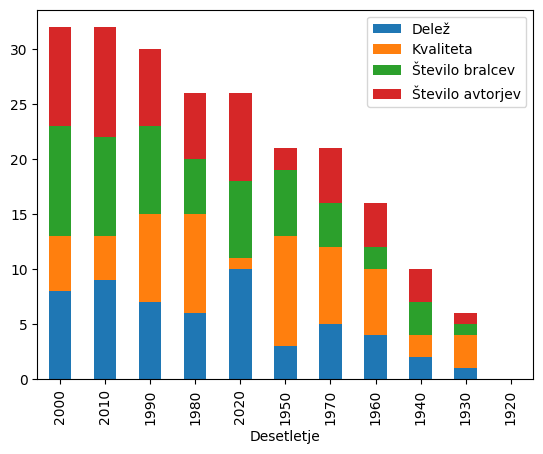

In [96]:
graf_desetletij = vrstni_red_po_tockah[['Desetletje', 'Delež', 'Kvaliteta', 'Število bralcev', 'Število avtorjev']].set_index('Desetletje').plot(kind='bar', stacked = True)

<Axes: xlabel='Desetletje'>

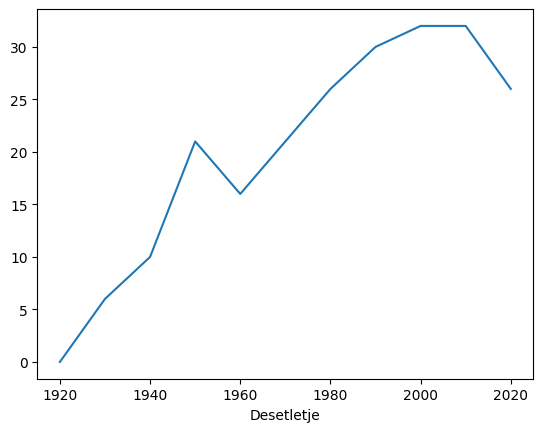

In [97]:
vrstni_red_po_tockah.sort_values('Desetletje').set_index('Desetletje')['Skupne točke'].plot()

<h3 style="text-align:center;font-family:Garamond;font-size:30px;"> Sklepi </h3>

<p style="font-family:'Times New Roman';font-size:20px;margin-bottom:1cm;"> paragraf </p>

<h2 style='text-align:center'> <div style="font-size : 30px; font-style : Verdana; text-align : center "> Zaključki </div> </h2>

<p style="font-family:'Times New Roman';font-size:20px;"> paragraf </p>  